Import knihoven a načtení předpřipravených dat:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
silove = pd.read_csv('strength_training_data.csv')
silove['datum'] = pd.to_datetime(silove['datum'])

In [ ]:
df_sleep_simple = pd.read_csv('sleep_simple.csv')
df_sleep_simple['calendarDate'] = pd.to_datetime(df_sleep_simple['calendarDate'])

In [ ]:
print("PŘÍPRAVA DAT PRO SPOJENÍ")
print()

# Důležité sloupce z tréninků
df_training = silove[['datum', 'calories', 'duration_minuty', 'avgHr', 'maxHr']].copy()

# Zaokrouhlení data na celý den
df_training['datum'] = pd.to_datetime(df_training['datum'])
df_training['datum'] = df_training['datum'].dt.date
df_training['datum'] = pd.to_datetime(df_training['datum'])

# Pojmenování sloupce
df_training.columns = ['calendarDate', 'training_calories', 'training_duration', 'training_avgHr', 'training_maxHr']

print(f"Tréninková data připravena: {len(df_training)} záznamů")
print(df_training.head())
print()

# Spojení dat o spánku a tréninku
print("SPOJUJI DATA...")
df_combined = df_sleep_simple.merge(df_training, on='calendarDate', how='left')

print(f"Spojených záznamů: {len(df_combined)}")
print()

df_combined['had_training'] = df_combined['training_calories'].notna()
print()

print("Statistika:")
print(f"Dní celkem: {len(df_combined)}")
print(f"Dní s tréninkem: {df_combined['had_training'].sum()}")
print(f"Dní bez tréninku: {(~df_combined['had_training']).sum()}")
print()

# Ukázka
print("Prvních 10 řádků spojených dat:")
print(df_combined.head(10))

PŘÍPRAVA DAT PRO SPOJENÍ

Tréninková data připravena: 93 záznamů
  calendarDate  training_calories  training_duration  training_avgHr  \
0   2025-12-17            1684.39           55408.60           126.0   
1   2025-12-16             515.37           24718.27           100.0   
2   2025-12-15             846.38           28073.68           118.0   
3   2025-12-15             414.81           15135.08           111.0   
4   2025-12-10            1596.40           46997.30           129.0   

   training_maxHr  
0           170.0  
1           150.0  
2           155.0  
3           145.0  
4           166.0  

SPOJUJI DATA...
Spojených záznamů: 359


Statistika:
Dní celkem: 359
Dní s tréninkem: 92
Dní bez tréninku: 267

Prvních 10 řádků spojených dat:
  calendarDate  totalSleepHours  overallScore  qualityScore  \
0   2024-12-22         5.266667            71            99   
1   2024-12-23         6.816667            75            77   
2   2024-12-24         7.150000            95   

/tmp/ipython-input-678721817.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(data_for_plot, labels=['S tréninkem', 'Bez tréninku'])
/tmp/ipython-input-678721817.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_for_plot2, labels=['S tréninkem', 'Bez tréninku'])


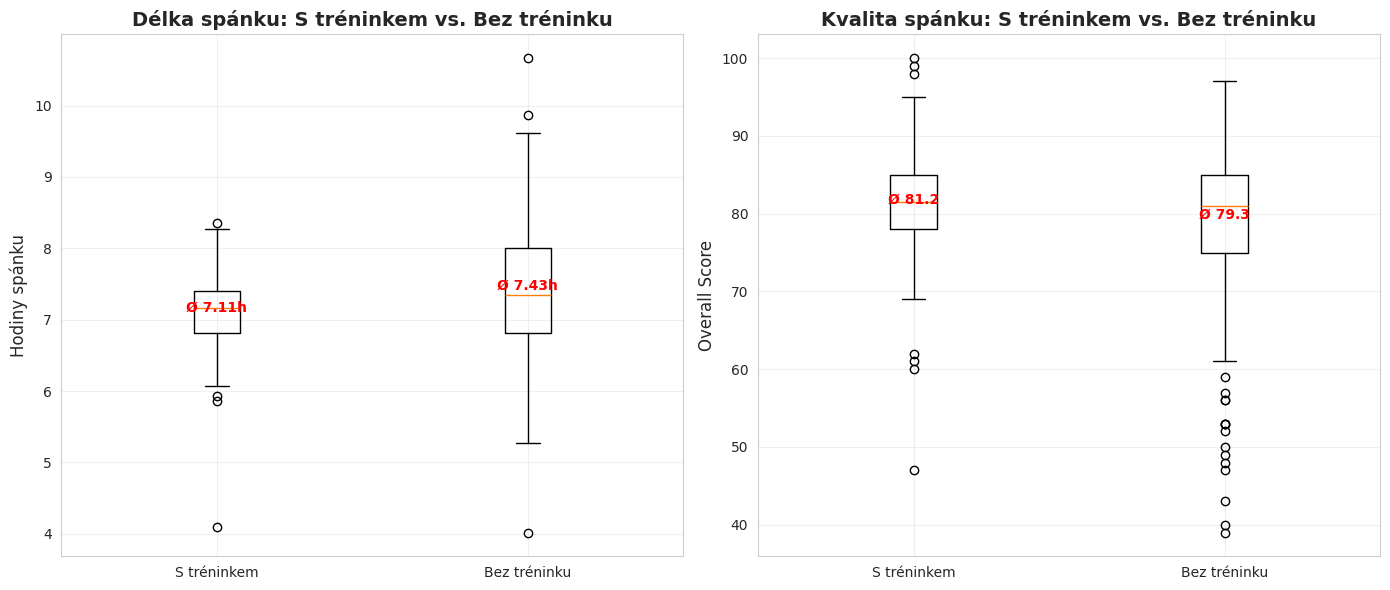

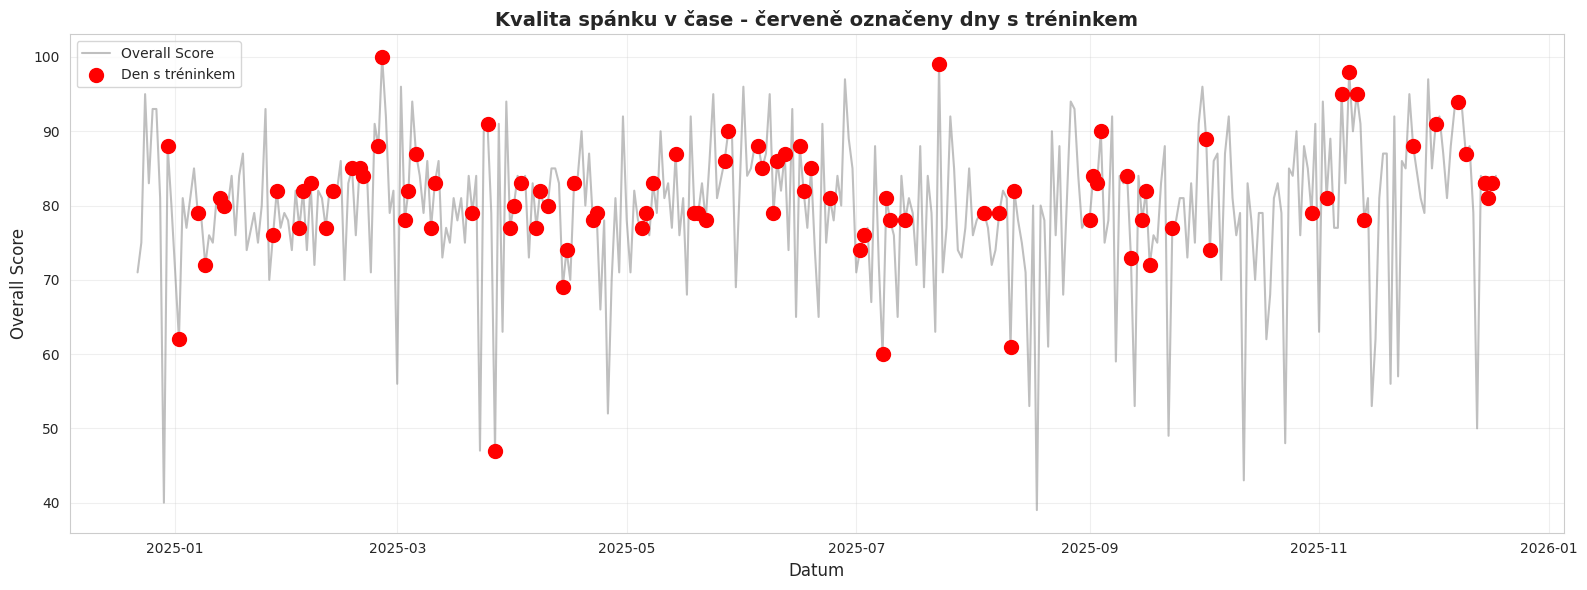

STATISTIKY:

Průměrný spánek:
  S tréninkem: 7.11 hodin
  Bez tréninku: 7.43 hodin
  Rozdíl: -0.32 hodin

Průměrný Overall Score:
  S tréninkem: 81.2
  Bez tréninku: 79.3
  Rozdíl: 1.9


In [ ]:
# Nastavení stylu
sns.set_style("whitegrid")

# VIZUALIZACE 1: POROVNÁNÍ SPÁNKU - Dny s tréninkem vs. bez tréninku
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graf 1: Délka spánku
data_for_plot = [
    df_combined[df_combined['had_training'] == True]['totalSleepHours'],
    df_combined[df_combined['had_training'] == False]['totalSleepHours']
]

axes[0].boxplot(data_for_plot, labels=['S tréninkem', 'Bez tréninku'])
axes[0].set_ylabel('Hodiny spánku', fontsize=12)
axes[0].set_title('Délka spánku: S tréninkem vs. Bez tréninku', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Přidám průměry
avg_with = df_combined[df_combined['had_training'] == True]['totalSleepHours'].mean()
avg_without = df_combined[df_combined['had_training'] == False]['totalSleepHours'].mean()
axes[0].text(1, avg_with, f'Ø {avg_with:.2f}h', ha='center', fontweight='bold', color='red')
axes[0].text(2, avg_without, f'Ø {avg_without:.2f}h', ha='center', fontweight='bold', color='red')

# Graf 2: Overall Score
data_for_plot2 = [
    df_combined[df_combined['had_training'] == True]['overallScore'],
    df_combined[df_combined['had_training'] == False]['overallScore']
]

axes[1].boxplot(data_for_plot2, labels=['S tréninkem', 'Bez tréninku'])
axes[1].set_ylabel('Overall Score', fontsize=12)
axes[1].set_title('Kvalita spánku: S tréninkem vs. Bez tréninku', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Přidám průměry
avg_score_with = df_combined[df_combined['had_training'] == True]['overallScore'].mean()
avg_score_without = df_combined[df_combined['had_training'] == False]['overallScore'].mean()
axes[1].text(1, avg_score_with, f'Ø {avg_score_with:.1f}', ha='center', fontweight='bold', color='red')
axes[1].text(2, avg_score_without, f'Ø {avg_score_without:.1f}', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# VIZUALIZACE 2: Časový vývoj s označením tréninků
plt.figure(figsize=(16, 6))
plt.plot(df_combined['calendarDate'], df_combined['overallScore'],
         linewidth=1.5, color='gray', alpha=0.5, label='Overall Score')

# Označ dny s tréninkem
training_days = df_combined[df_combined['had_training'] == True]
plt.scatter(training_days['calendarDate'], training_days['overallScore'],
           s=100, color='red', marker='o', label='Den s tréninkem', zorder=5)

plt.xlabel('Datum', fontsize=12)
plt.ylabel('Overall Score', fontsize=12)
plt.title('Kvalita spánku v čase - červeně označeny dny s tréninkem', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Statistiky
print("STATISTIKY:")
print()
print("Průměrný spánek:")
print(f"  S tréninkem: {avg_with:.2f} hodin")
print(f"  Bez tréninku: {avg_without:.2f} hodin")
print(f"  Rozdíl: {avg_with - avg_without:.2f} hodin")
print()
print("Průměrný Overall Score:")
print(f"  S tréninkem: {avg_score_with:.1f}")
print(f"  Bez tréninku: {avg_score_without:.1f}")
print(f"  Rozdíl: {avg_score_with - avg_score_without:.1f}")

CO TO ZNAMENÁ:
1. Délka spánku:

S tréninkem: 7.11 hodin
Bez tréninku: 7.43 hodin
→ V dny s tréninkem spánek o 20 minut MÉNĚ

2. Kvalita spánku (Overall Score):

S tréninkem: 81.2 bodů
Bez tréninku: 79.3 bodů
→ V dny s tréninkem o 2 body LEPŠÍ kvalita


ZÁVĚR:
V dny s tréninkem, kratší doba spánku, ALE kvalitněji!
To dává smysl:

Silový trénink unaví tělo
Tělo potřebuje regeneraci → hlubší, kvalitnější spánek
Možná jdeš spát později (po tréninku), proto kratší doba


Je to statisticky významné?
Rozdíl -0.32 hodiny (20 minut) = malý, ale konzistentní
Rozdíl +1.9 bodů v kvalitě = viditelný pozitivní efekt

ANALÝZA ZPOŽDĚNÉHO EFEKTU TRÉNINKU NA SPÁNEK

Počet dní v každé kategorii:
training_category
Bez tréninku        205
Hned po tréninku     92
Den po tréninku      62
Name: count, dtype: int64

PRŮMĚRY:
                   totalSleepHours  overallScore  qualityScore
training_category                                             
Bez tréninku              7.480407     78.887805     81.497561
Den po tréninku           7.247312     80.806452     85.129032
Hned po tréninku          7.109783     81.250000     85.630435



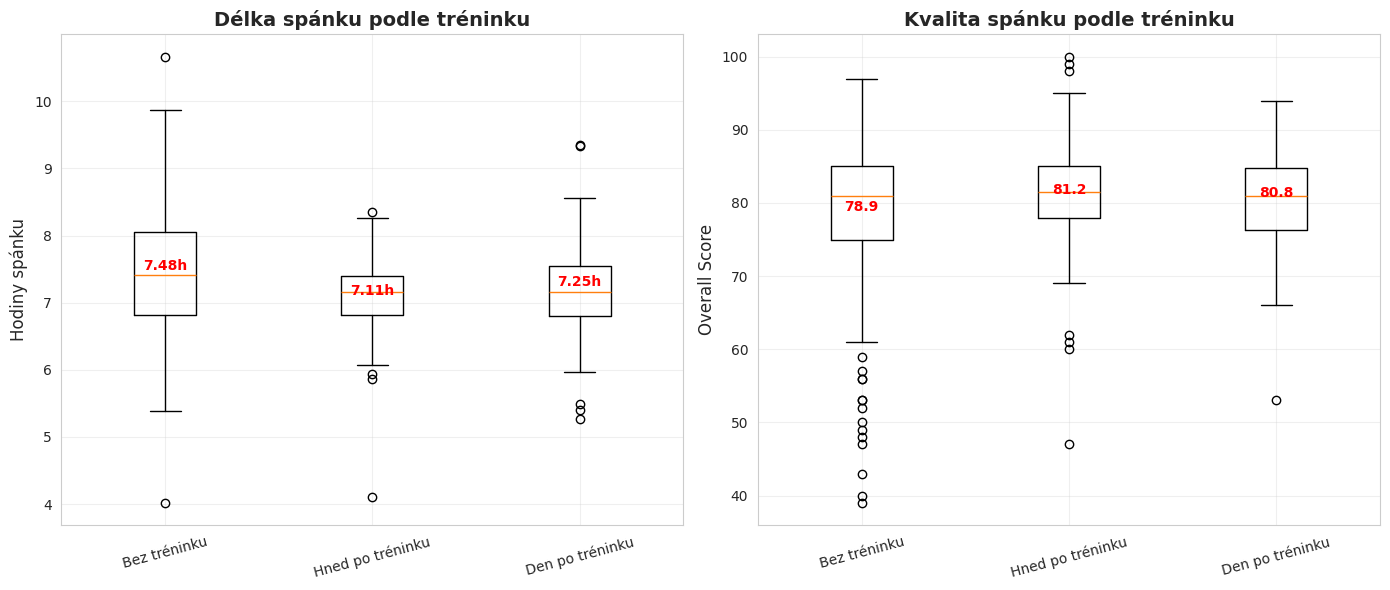


ZJIŠTĚNÍ:
Kvalita spánku bez tréninku: 78.9
Kvalita spánku hned po tréninku: 81.2 (rozdíl: +2.4)
Kvalita spánku den po tréninku: 80.8 (rozdíl: +1.9)


In [ ]:
# ANALÝZA 1: Spánek HNED po tréninku vs. DALŠÍ NOC
print("ANALÝZA ZPOŽDĚNÉHO EFEKTU TRÉNINKU NA SPÁNEK")
print("="*60)
print()

# Sloupec "byl včera trénink?"
df_combined = df_combined.sort_values('calendarDate').reset_index(drop=True)
df_combined['training_yesterday'] = df_combined['had_training'].shift(1)

# Kategorizování
def categorize_training(row):
    if row['had_training']:
        return 'Hned po tréninku'
    elif row['training_yesterday']:
        return 'Den po tréninku'
    else:
        return 'Bez tréninku'

df_combined['training_category'] = df_combined.apply(categorize_training, axis=1)

# Statistiky
print("Počet dní v každé kategorii:")
print(df_combined['training_category'].value_counts())
print()

# Průměry pro každou kategorii
summary = df_combined.groupby('training_category')[['totalSleepHours', 'overallScore', 'qualityScore']].mean()
print("PRŮMĚRY:")
print(summary)
print()

# VIZUALIZACE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graf 1: Délka spánku
categories = ['Bez tréninku', 'Hned po tréninku', 'Den po tréninku']
sleep_data = [df_combined[df_combined['training_category'] == cat]['totalSleepHours']
              for cat in categories]

axes[0].boxplot(sleep_data, tick_labels=categories)
axes[0].set_ylabel('Hodiny spánku', fontsize=12)
axes[0].set_title('Délka spánku podle tréninku', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True, alpha=0.3)

# Průměry na graf
for i, cat in enumerate(categories, 1):
    avg = df_combined[df_combined['training_category'] == cat]['totalSleepHours'].mean()
    axes[0].text(i, avg, f'{avg:.2f}h', ha='center', fontweight='bold', color='red')

# Graf 2: Overall Score
score_data = [df_combined[df_combined['training_category'] == cat]['overallScore']
              for cat in categories]

axes[1].boxplot(score_data, tick_labels=categories)
axes[1].set_ylabel('Overall Score', fontsize=12)
axes[1].set_title('Kvalita spánku podle tréninku', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(True, alpha=0.3)

# Průměry na graf
for i, cat in enumerate(categories, 1):
    avg = df_combined[df_combined['training_category'] == cat]['overallScore'].mean()
    axes[1].text(i, avg, f'{avg:.1f}', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Závěry
print()
print("ZJIŠTĚNÍ:")
avg_no_training = df_combined[df_combined['training_category'] == 'Bez tréninku']['overallScore'].mean()
avg_after_training = df_combined[df_combined['training_category'] == 'Hned po tréninku']['overallScore'].mean()
avg_day_after = df_combined[df_combined['training_category'] == 'Den po tréninku']['overallScore'].mean()

print(f"Kvalita spánku bez tréninku: {avg_no_training:.1f}")
print(f"Kvalita spánku hned po tréninku: {avg_after_training:.1f} (rozdíl: {avg_after_training - avg_no_training:+.1f})")
print(f"Kvalita spánku den po tréninku: {avg_day_after:.1f} (rozdíl: {avg_day_after - avg_no_training:+.1f})")

Interpretace dat:
1. DÉLKA SPÁNKU:

Bez tréninku: 7.48 hodin (nejdelší)
Den po tréninku: 7.25 hodin
Hned po tréninku: 7.11 hodin (nejkratší)

→ Čím blíže k tréninku, tím kratší spánek

2. KVALITA SPÁNKU (Overall Score):

Bez tréninku: 78.9 bodů (nejhorší)
Den po tréninku: 80.8 bodů (+1.9)
Hned po tréninku: 81.2 bodů (+2.4)

→ NEJLEPŠÍ kvalita je hned po tréninku!

3. QUALITY SCORE (detailnější metrika):

Bez tréninku: 81.5
Den po tréninku: 85.1 (+3.6)
Hned po tréninku: 85.6 (+4.1)

→ Ještě výraznější rozdíl!

ZÁVĚR:
Spánek po kratší dobu, ale MNOHEM KVALITNÍ!
Po tréninku:

Spánek o 20 minut méně
ALE kvalita spánku je o 2.4 bodu lepší
Quality Score dokonce o 4.1 bodu lepší!

Den po tréninku:

Efekt ještě částečně přetrvává
Stále lepší kvalita než bez tréninku
Tělo ještě regeneruje


CO TO PRAKTICKY ZNAMENÁ:
Trénink výrazně zlepšuje kvalitu spánku
Efekt je nejsilnější hned tu noc po tréninku
Kratší, ale kvalitnější spánek = lepší regenerace

ANALÝZA: INTENZITA TRÉNINKU A KVALITA SPÁNKU

Analyzuji 92 dní s tréninkem

STATISTIKY SPÁLENÝCH KALORIÍ:
count      92.000000
mean     1303.142826
std       421.490998
min       414.810000
25%      1025.502500
50%      1202.540000
75%      1597.447500
max      2367.360000
Name: training_calories, dtype: float64

Hranice intenzit:
Nízká intenzita: < 1026 kcal
Střední intenzita: 1026 - 1597 kcal
Vysoká intenzita: > 1597 kcal

Počet tréninků v každé kategorii:
intensity
Střední intenzita    46
Vysoká intenzita     23
Nízká intenzita      23
Name: count, dtype: int64

PRŮMĚRY PODLE INTENZITY:
                   training_calories  totalSleepHours  overallScore  \
intensity                                                             
Nízká intenzita           820.693478         7.220290     83.173913   
Střední intenzita        1259.833261         7.136232     81.195652   
Vysoká intenzita         1872.211304         6.946377     79.434783   

                   qualityScore  
intensity    

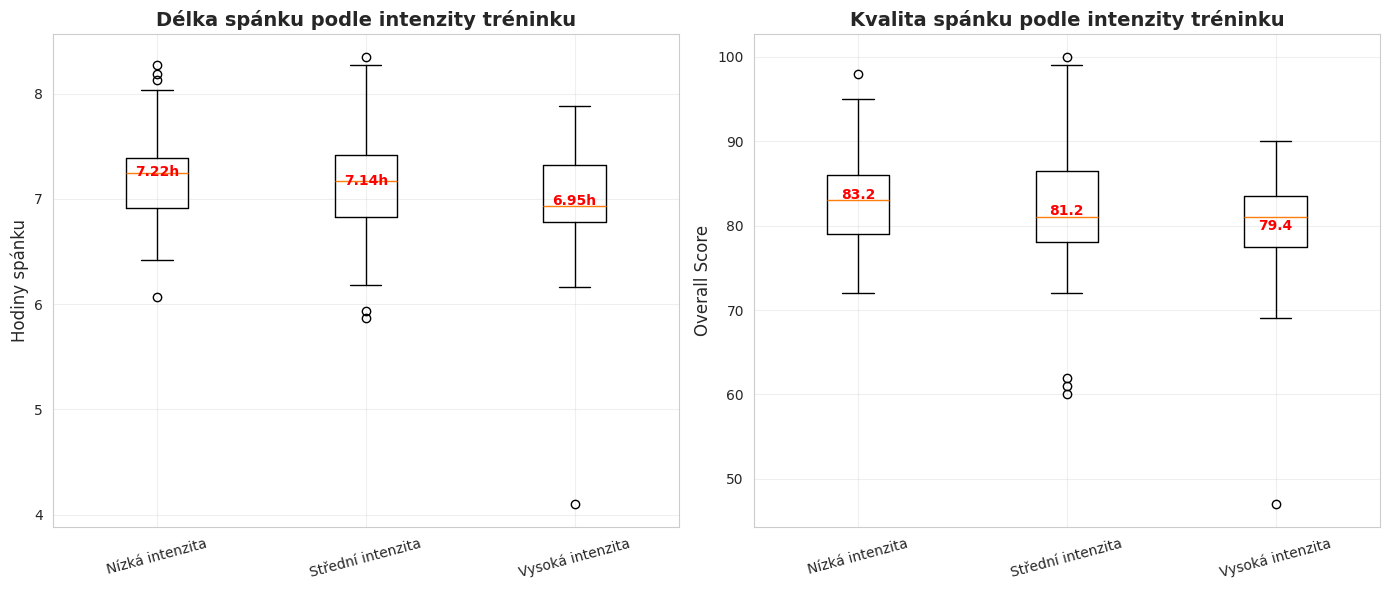

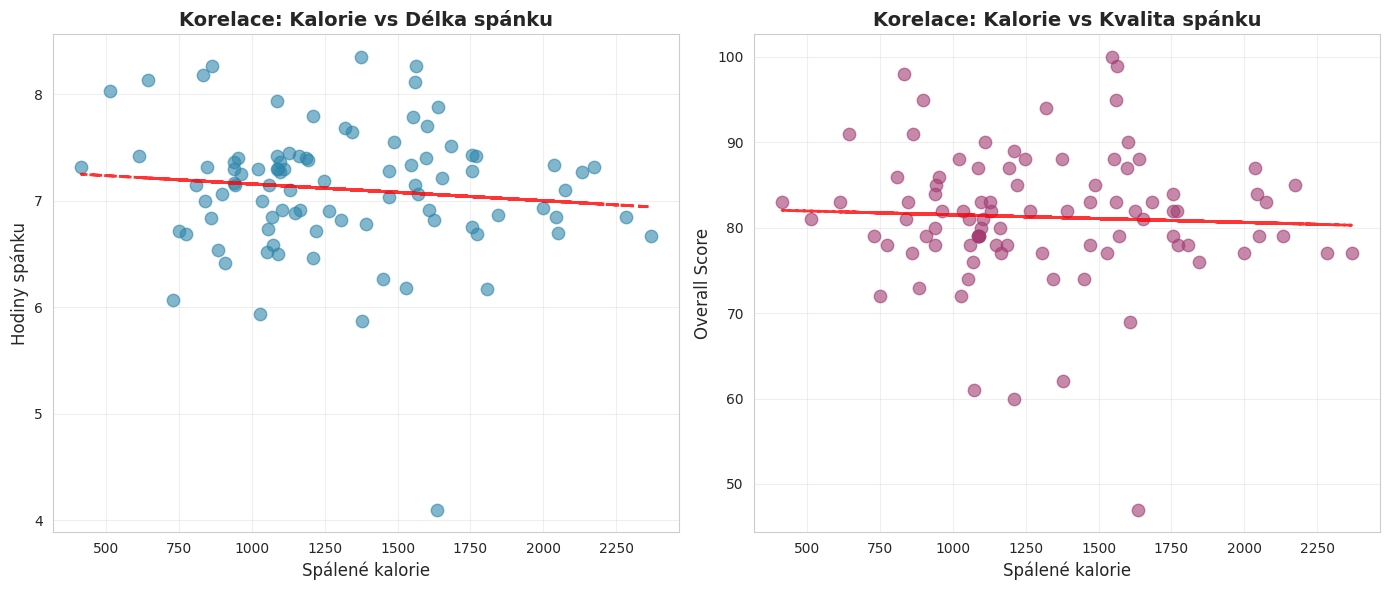


KORELACE:
Kalorie ↔ Délka spánku: -0.109
Kalorie ↔ Kvalita spánku: -0.048

(Korelace: -1 až +1, čím blíže k 0, tím menší souvislost)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ANALÝZA 2: INTENZITA TRÉNINKU (kalorie) vs. KVALITA SPÁNKU
print("ANALÝZA: INTENZITA TRÉNINKU A KVALITA SPÁNKU")
print("="*60)
print()

# Filtruj jen dny S TRÉNINKEM
df_with_training = df_combined[df_combined['had_training'] == True].copy()

print(f"Analyzuji {len(df_with_training)} dní s tréninkem")
print()

# Statistiky kalorií
print("STATISTIKY SPÁLENÝCH KALORIÍ:")
print(df_with_training['training_calories'].describe())
print()

# Rozděl tréninky na NÍZKÁ / STŘEDNÍ / VYSOKÁ intenzita
q25 = df_with_training['training_calories'].quantile(0.25)
q75 = df_with_training['training_calories'].quantile(0.75)

def categorize_intensity(calories):
    if calories < q25:
        return 'Nízká intenzita'
    elif calories < q75:
        return 'Střední intenzita'
    else:
        return 'Vysoká intenzita'

df_with_training['intensity'] = df_with_training['training_calories'].apply(categorize_intensity)

print("Hranice intenzit:")
print(f"Nízká intenzita: < {q25:.0f} kcal")
print(f"Střední intenzita: {q25:.0f} - {q75:.0f} kcal")
print(f"Vysoká intenzita: > {q75:.0f} kcal")
print()

print("Počet tréninků v každé kategorii:")
print(df_with_training['intensity'].value_counts())
print()

# Průměry podle intenzity
summary = df_with_training.groupby('intensity')[['training_calories', 'totalSleepHours',
                                                   'overallScore', 'qualityScore']].mean()
print("PRŮMĚRY PODLE INTENZITY:")
print(summary)
print()

# VIZUALIZACE 1: Boxploty
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

categories = ['Nízká intenzita', 'Střední intenzita', 'Vysoká intenzita']

# Graf 1: Délka spánku
sleep_by_intensity = [df_with_training[df_with_training['intensity'] == cat]['totalSleepHours']
                      for cat in categories]

axes[0].boxplot(sleep_by_intensity, tick_labels=categories)
axes[0].set_ylabel('Hodiny spánku', fontsize=12)
axes[0].set_title('Délka spánku podle intenzity tréninku', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True, alpha=0.3)

for i, cat in enumerate(categories, 1):
    avg = df_with_training[df_with_training['intensity'] == cat]['totalSleepHours'].mean()
    axes[0].text(i, avg, f'{avg:.2f}h', ha='center', fontweight='bold', color='red')

# Graf 2: Overall Score
score_by_intensity = [df_with_training[df_with_training['intensity'] == cat]['overallScore']
                      for cat in categories]

axes[1].boxplot(score_by_intensity, tick_labels=categories)
axes[1].set_ylabel('Overall Score', fontsize=12)
axes[1].set_title('Kvalita spánku podle intenzity tréninku', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(True, alpha=0.3)

for i, cat in enumerate(categories, 1):
    avg = df_with_training[df_with_training['intensity'] == cat]['overallScore'].mean()
    axes[1].text(i, avg, f'{avg:.1f}', ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# VIZUALIZACE 2: Scatter plot - korelace
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graf 1: Kalorie vs Délka spánku
axes[0].scatter(df_with_training['training_calories'], df_with_training['totalSleepHours'],
                alpha=0.6, s=80, color='#2E86AB')
axes[0].set_xlabel('Spálené kalorie', fontsize=12)
axes[0].set_ylabel('Hodiny spánku', fontsize=12)
axes[0].set_title('Korelace: Kalorie vs Délka spánku', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Přidám trend line
z = np.polyfit(df_with_training['training_calories'], df_with_training['totalSleepHours'], 1)
p = np.poly1d(z)
axes[0].plot(df_with_training['training_calories'], p(df_with_training['training_calories']),
            "r--", alpha=0.8, linewidth=2)

# Graf 2: Kalorie vs Overall Score
axes[1].scatter(df_with_training['training_calories'], df_with_training['overallScore'],
                alpha=0.6, s=80, color='#A23B72')
axes[1].set_xlabel('Spálené kalorie', fontsize=12)
axes[1].set_ylabel('Overall Score', fontsize=12)
axes[1].set_title('Korelace: Kalorie vs Kvalita spánku', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Přidám trend line
z = np.polyfit(df_with_training['training_calories'], df_with_training['overallScore'], 1)
p = np.poly1d(z)
axes[1].plot(df_with_training['training_calories'], p(df_with_training['training_calories']),
            "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Korelační koeficienty
print()
print("KORELACE:")
corr_calories_sleep = df_with_training['training_calories'].corr(df_with_training['totalSleepHours'])
corr_calories_score = df_with_training['training_calories'].corr(df_with_training['overallScore'])

print(f"Kalorie ↔ Délka spánku: {corr_calories_sleep:.3f}")
print(f"Kalorie ↔ Kvalita spánku: {corr_calories_score:.3f}")
print()
print("(Korelace: -1 až +1, čím blíže k 0, tím menší souvislost)")

**INTERPRETACE DAT:**
**1. DÉLKA SPÁNKU podle intenzity:**

Nízká intenzita: 7.22 hodin (nejdelší)
Střední intenzita: 7.14 hodin
Vysoká intenzita: 6.95 hodin (nejkratší)

→ Čím tvrdší trénink, tím KRATŠÍ spánek!


**2. KVALITA SPÁNKU (Overall Score):**

Nízká intenzita: 83.2 bodů (NEJLEPŠÍ!)
Střední intenzita: 81.2 bodů
Vysoká intenzita: 79.4 bodů (NEJHORŠÍ)

→ Čím tvrdší trénink, tím HORŠÍ kvalita!


**3. KORELACE:**
Kalorie ↔ Délka: -0.109 (slabá negativní)
Kalorie ↔ Kvalita: -0.048 (téměř žádná)

→ Není to silná souvislost, ale TREND je jasný


**CO TO ZNAMENÁ?**
Překvapivý závěr: "VÍC NENÍ VŽDYCKY LÍPU!"

Lehčí tréninky (< 1026 kcal):

Nejdelší spánek (7.2h)
Nejlepší kvalita (83.2)
Tělo regeneruje snáze


Těžké tréninky (> 1597 kcal):

Kratší spánek (6.9h)
Horší kvalita (79.4)
Možné přetrénování

SHRNUTÍ:
Data ukazují: Kvalitní spánek je po lehčím a středním tréninku, ne po těch nejtěžších!